In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vdf = pd.read_csv("..\Data\sa2_votes.csv")

In [3]:
# Get Census data for Selected Stats
cdf = pd.read_csv("..\Data\census_selected_characteristics.csv")

In [4]:
df = pd.merge(vdf, cdf, left_on = "SA2_MAIN16", right_on = "sa2_maincode_2016")
df["Preferred Party"] = np.where(df["liberal/national coalition votes"] / df["totalvotes"] > 0.5, "Liberal", "ALP")

In [5]:
df.head()

,Unnamed: 0,SA2_MAIN16,STE_NAME16,GCC_CODE16,liberal/national coalition votes,australian labor party votes,totalvotes,sa2_maincode_2016,tot_p_p,age_20_24_yr_p,...,age_45_54_percent,age_55_64_percent,age_65_74_percent,age_75_84_percent,age_85ov_percent,indigenous_percent,birthplace_australia_percent,lang_eng_only_percent,high_yr_12_comp_percent,Preferred Party
0,0,101021007,New South Wales,1RNSW,655,850,1505,101021007,3872,110,...,0.149019,0.179752,0.152893,0.062758,0.019886,0.019370,0.761364,0.852273,0.362087,ALP
1,1,101021008,New South Wales,1RNSW,600,937,1537,101021008,8247,534,...,0.145022,0.127319,0.080514,0.037953,0.010064,0.061356,0.770462,0.806233,0.377107,ALP
2,2,101021009,New South Wales,1RNSW,7954,9937,17891,101021009,10842,762,...,0.127836,0.103948,0.075540,0.048423,0.028961,0.029515,0.670817,0.711954,0.441616,ALP
3,3,101021010,New South Wales,1RNSW,756,1040,1796,101021010,4786,359,...,0.146678,0.118888,0.065190,0.033431,0.010656,0.036774,0.687631,0.734643,0.488508,ALP
4,4,101021011,New South Wales,1RNSW,3023,3052,6075,101021011,16946,795,...,0.173138,0.143220,0.084740,0.024076,0.005075,0.019828,0.769503,0.847634,0.450372,ALP


In [18]:
pdf = df[["SA2_MAIN16", "STE_NAME16", "Preferred Party", "birthplace_australia_percent", "lang_eng_only_percent"]]
pdf = pdf.loc[pdf["STE_NAME16"] != "Other Territories",]
pdf = pdf.sort_values(by = ["STE_NAME16", "Preferred Party"], ascending = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000156CA9A9A08>]],
      dtype=object)

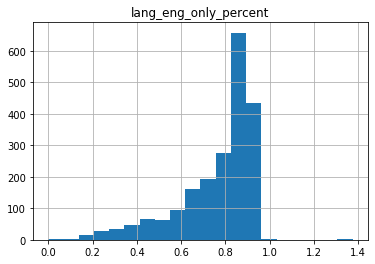

In [15]:
df.hist(column = ["lang_eng_only_percent"], bins = 20)

In [8]:
cut_labels = ["Very Low","Low","Average","High","Very High"]
cut_bins = [0, .4, .6, .7, .8, 1]
pdf["birthplace_bins"] = pd.cut(pdf["birthplace_australia_percent"],
                               bins = cut_bins,
                               labels = cut_labels)
pdf = pdf.groupby(["Preferred Party", "birthplace_bins"]).size().reset_index(name = "Count")
pdf.head()

,Preferred Party,birthplace_bins,Count
0,ALP,Very Low,58
1,ALP,Low,258
2,ALP,Average,217
3,ALP,High,244
4,ALP,Very High,146


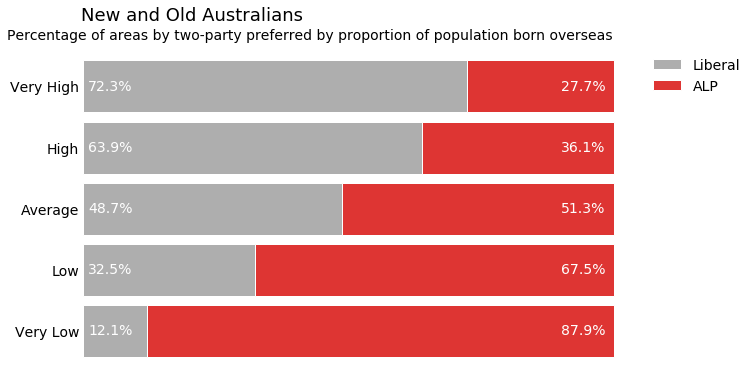

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))
bar_height = 0.85
text_colour = "white"
lib_colour = "#aeaeae"
alp_colour = "#DE3533"

# Set plot values
parties = pdf.loc[:,"Preferred Party"].unique()
birthplace_bins = (pdf.loc[:,"birthplace_bins"].unique())

for birthplace_bin in birthplace_bins:
    # Find the position of the state in the list
    position = [i for i,x in enumerate(birthplace_bins) if x == birthplace_bin][0]
    
    # Calculate Lib/ALP TPP Percent
    total = sum(pdf.loc[pdf["birthplace_bins"] == birthplace_bin, "Count"])
    lib_pct = (pdf.loc[(pdf["birthplace_bins"] == birthplace_bin) & (pdf["Preferred Party"] == "Liberal"), "Count"] / total) * 100
    alp_pct = (pdf.loc[(pdf["birthplace_bins"] == birthplace_bin) & (pdf["Preferred Party"] == "ALP"), "Count"] / total) * 100
    
    # Create Horizontal Bar Chart
    axes.barh(birthplace_bin, lib_pct, color = lib_colour, edgecolor = "white", height = bar_height)
    axes.barh(birthplace_bin, alp_pct, left = lib_pct, color = alp_colour, edgecolor = "white", height = bar_height)
    
    # Add text to bars
    axes.text(1, position, s = str(round(lib_pct.values[0],1)) + "%", color = text_colour, va = "center", fontsize = 14)
    if alp_pct.values[0] > 0.0:
        axes.text(90, position, s = str(round(alp_pct.values[0],1)) + "%", color = text_colour, va = "center", fontsize = 14)
    
# Set title
axes.set_title("Percentage of areas by two-party preferred by proportion of population born overseas"
               ,fontsize = 14
               ,ma = "left"
               ,ha = "right"
               ,position= (0.95,1))
fig.suptitle("New and Old Australians"
             ,fontsize = 18
             ,ma = "left"
             ,ha = "right"
             ,position= (0.431,0.97))

# Remove tick marks
axes.tick_params(axis = "both", length = 0, labelsize = 14)
axes.get_xaxis().set_visible(False)

 # Remove spines
axes.spines["right"].set_position(('data', 100))
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["right"].set_visible(False)

box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 1, box.height])
axes.legend(("Liberal","ALP"),fontsize = 14, frameon = False, bbox_to_anchor = (1, 1))

In [25]:
# Reset  for language
pdf = df[["SA2_MAIN16", "STE_NAME16", "Preferred Party", "lang_eng_only_percent"]]
pdf = pdf.loc[pdf["STE_NAME16"] != "Other Territories",]
pdf = pdf.sort_values(by = ["STE_NAME16", "Preferred Party"], ascending = True)

In [26]:
cut_labels = ["Very High","High","Average","Low","Very Low"]
cut_bins = [0, .4, .6, .8, .9, 1]
pdf["eng_only_bins"] = pd.cut(pdf["lang_eng_only_percent"],
                               bins = cut_bins,
                               labels = cut_labels)
pdf = pdf.groupby(["Preferred Party", "eng_only_bins"]).size().reset_index(name = "Count")
pdf.head()

,Preferred Party,eng_only_bins,Count
0,ALP,Very High,105
1,ALP,High,149
2,ALP,Average,301
3,ALP,Low,275
4,ALP,Very Low,92


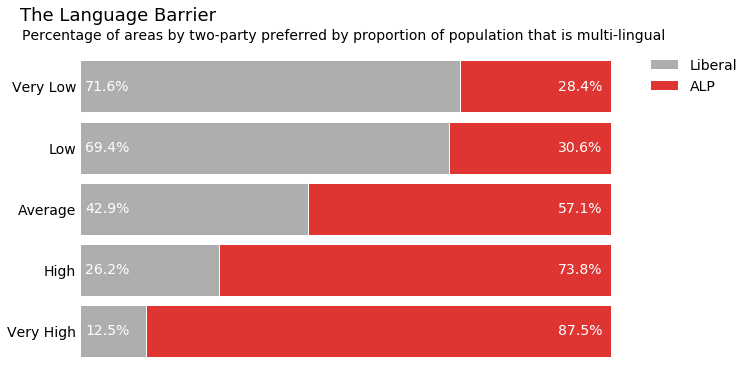

In [47]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))
bar_height = 0.85
text_colour = "white"
lib_colour = "#aeaeae"
alp_colour = "#DE3533"

# Set plot values
parties = pdf.loc[:,"Preferred Party"].unique()
eng_only_bins = (pdf.loc[:,"eng_only_bins"].unique())

for eng_only_bin in eng_only_bins:
    # Find the position of the state in the list
    position = [i for i,x in enumerate(eng_only_bins) if x == eng_only_bin][0]
    
    # Calculate Lib/ALP TPP Percent
    total = sum(pdf.loc[pdf["eng_only_bins"] == eng_only_bin, "Count"])
    lib_pct = (pdf.loc[(pdf["eng_only_bins"] == eng_only_bin) & (pdf["Preferred Party"] == "Liberal"), "Count"] / total) * 100
    alp_pct = (pdf.loc[(pdf["eng_only_bins"] == eng_only_bin) & (pdf["Preferred Party"] == "ALP"), "Count"] / total) * 100
    
    # Create Horizontal Bar Chart
    axes.barh(eng_only_bin, lib_pct, color = lib_colour, edgecolor = "white", height = bar_height)
    axes.barh(eng_only_bin, alp_pct, left = lib_pct, color = alp_colour, edgecolor = "white", height = bar_height)
    
    # Add text to bars
    axes.text(1, position, s = str(round(lib_pct.values[0],1)) + "%", color = text_colour, va = "center", fontsize = 14)
    if alp_pct.values[0] > 0.0:
        axes.text(90, position, s = str(round(alp_pct.values[0],1)) + "%", color = text_colour, va = "center", fontsize = 14)
    
# Set title
axes.set_title("Percentage of areas by two-party preferred by proportion of population that is multi-lingual"
               ,fontsize = 14
               ,ma = "left"
               ,ha = "right"
               ,position= (1.05,1))
fig.suptitle("The Language Barrier"
             ,fontsize = 18
             ,ma = "left"
             ,ha = "right"
             ,position= (0.315,0.97))

# Remove tick marks
axes.tick_params(axis = "both", length = 0, labelsize = 14)
axes.get_xaxis().set_visible(False)

 # Remove spines
axes.spines["right"].set_position(('data', 100))
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["right"].set_visible(False)

box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 1, box.height])
axes.legend(("Liberal","ALP"),fontsize = 14, frameon = False, bbox_to_anchor = (1, 1))

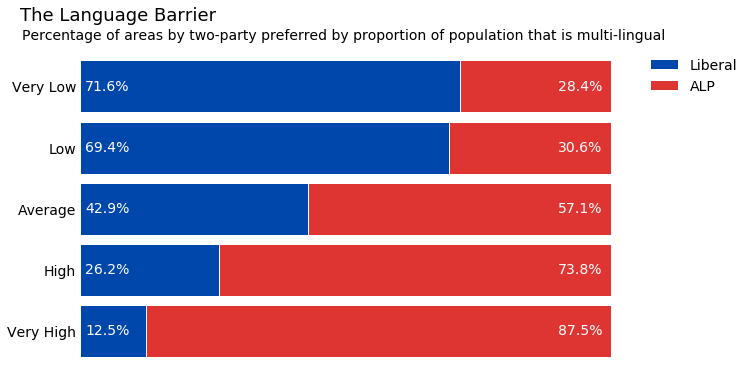

In [48]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))
bar_height = 0.85
text_colour = "white"
lib_colour = "#0047AB"
alp_colour = "#DE3533"

# Set plot values
parties = pdf.loc[:,"Preferred Party"].unique()
eng_only_bins = (pdf.loc[:,"eng_only_bins"].unique())

for eng_only_bin in eng_only_bins:
    # Find the position of the state in the list
    position = [i for i,x in enumerate(eng_only_bins) if x == eng_only_bin][0]
    
    # Calculate Lib/ALP TPP Percent
    total = sum(pdf.loc[pdf["eng_only_bins"] == eng_only_bin, "Count"])
    lib_pct = (pdf.loc[(pdf["eng_only_bins"] == eng_only_bin) & (pdf["Preferred Party"] == "Liberal"), "Count"] / total) * 100
    alp_pct = (pdf.loc[(pdf["eng_only_bins"] == eng_only_bin) & (pdf["Preferred Party"] == "ALP"), "Count"] / total) * 100
    
    # Create Horizontal Bar Chart
    axes.barh(eng_only_bin, lib_pct, color = lib_colour, edgecolor = "white", height = bar_height)
    axes.barh(eng_only_bin, alp_pct, left = lib_pct, color = alp_colour, edgecolor = "white", height = bar_height)
    
    # Add text to bars
    axes.text(1, position, s = str(round(lib_pct.values[0],1)) + "%", color = text_colour, va = "center", fontsize = 14)
    if alp_pct.values[0] > 0.0:
        axes.text(90, position, s = str(round(alp_pct.values[0],1)) + "%", color = text_colour, va = "center", fontsize = 14)
    
# Set title
axes.set_title("Percentage of areas by two-party preferred by proportion of population that is multi-lingual"
               ,fontsize = 14
               ,ma = "left"
               ,ha = "right"
               ,position= (1.05,1))
fig.suptitle("The Language Barrier"
             ,fontsize = 18
             ,ma = "left"
             ,ha = "right"
             ,position= (0.315,0.97))

# Remove tick marks
axes.tick_params(axis = "both", length = 0, labelsize = 14)
axes.get_xaxis().set_visible(False)

 # Remove spines
axes.spines["right"].set_position(('data', 100))
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["right"].set_visible(False)

box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 1, box.height])
axes.legend(("Liberal","ALP"),fontsize = 14, frameon = False, bbox_to_anchor = (1, 1))